<a href="https://colab.research.google.com/github/A1171/ColabNotebooks/blob/main/TimeseriaDatagnerator_Callback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Генератор выборки временных рядов

In [1]:
import numpy as np
import keras
from keras import regularizers
import datetime
from keras.models import Sequential
from keras import layers
#from keras.layers import Dense, Dropout, Activation,Conv1D,MaxPool1D,Flatten,LeakyReLU,concatenate
from keras import activations
#from keras.optimizers import SGD
#from keras.optimizers import adam
from keras.models import load_model
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn import metrics
import tensorflow as tf
import pickle
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer,StandardScaler,MinMaxScaler
import tensorflow.keras.backend as K
import gc

In [32]:
#Длинна последовательности
SequencyLen=32
#Шаг записей для генерации
RecordsStep=1
#Количество классов классификатора для функции шаблона создания выхода
NClasses=3
HistoryFileDir="drive/My Drive/NN/DiplShares/"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def TemplateL5_11_len4(y_data_train2):#4 периода TP=0.2 SL=0.2
  BuyPr=y_data_train2[4]
  SellPr=-y_data_train2[4]
def TemplateL5_11_len4Profit(y_data_train2):#4 периода TP=0.2 SL=0.2
  BuyPr=y_data_train2[14]
  SellPr=-y_data_train2[14]
  return np.array([BuyPr,SellPr])
def TemplateL5_21_len4(y_data_train2):#4 периода TP=0.4 SL=0.2
  if(y_data_train2[114]==1 and y_data_train2[104]==1):
    return 1
  if(y_data_train2[114]==2 and y_data_train2[104]==2):
    return -1
  return 0
def TemplateL5_21_len4Profit(y_data_train2):#4 периода TP=0.4 SL=0.2
  BuyPr=y_data_train2[34]
  if(y_data_train2[104]==2 or y_data_train2[104]==3):BuyPr=-0.5
  SellPr=-y_data_train2[34]
  if(y_data_train2[104]==1 or y_data_train2[104]==3):SellPr=-0.5
  return np.array([BuyPr,SellPr])

def TemplateL5_25_len4(y_data_train2):#4 периода TP=0.2 SL=0.4
  if(int(y_data_train2[114])&2==0 and int(y_data_train2[104])&1>0):
    return 1
  if(int(y_data_train2[114])&1==0 and int(y_data_train2[104])&2>0):
    return -1
  return 0
def TemplateL5_25_len4Profit(y_data_train2):#4 периода TP=0.2 SL=0.4
  BuyPr=y_data_train2[34]
  if(int(y_data_train2[114])&2==0 and int(y_data_train2[104])&1>0):BuyPr=0.5
  SellPr=-y_data_train2[34]
  if(int(y_data_train2[114])&1==0 and int(y_data_train2[104])&2>0):SellPr=0.5
  return np.array([BuyPr,SellPr])

In [103]:
#Функция оценки результата
def TradeResultMdf(Pred,ProfitArr,Border=[0,0,0]):
  Volume=0
  VolumeBuy=0
  VolumeSell=0
  Profit=0
  WinVolumeBuy=0
  LossVolumeBuy=0
  WinVolumeSell=0
  LossVolumeSell=0
  BuyArr=Pred[:,0]-Border[0]
  SellArr=Pred[:,2]-Border[2]
  BuyArr1=np.logical_and(BuyArr>Pred[:,1],BuyArr>Pred[:,2])
  SellArr1=np.logical_and(SellArr>Pred[:,1],SellArr>Pred[:,0])
  VolumeBuy=np.sum(np.abs(ProfitArr[:,0][BuyArr1]))
  ProfitBuy=np.sum(ProfitArr[:,0][BuyArr1])
  VolumeSell=np.sum(np.abs(ProfitArr[:,1][SellArr1]))
  ProfitSell=np.sum(ProfitArr[:,1][SellArr1])
  VolumeAll=np.sum(np.abs(ProfitArr))/2
  Recall=(VolumeBuy+VolumeSell)/VolumeAll
  del BuyArr
  del SellArr
  del BuyArr1
  del SellArr1
  return ProfitBuy,ProfitSell, VolumeBuy,VolumeSell, Recall
#Функция расчета доходности от границы классификации
def ClassBorderProfit(Pred,ProfitArr,STDBorders,AddSTDCorrection=True):
  NumOuts2=Pred.shape[1]//NClasses
  NumSTDBorders=len(STDBorders)
  PFArr=np.zeros((NumSTDBorders,NumOuts2))
  RecallArr=np.zeros((NumSTDBorders,NumOuts2))
  PFArrBuy=np.zeros((NumSTDBorders,NumOuts2))
  PFArrSell=np.zeros((NumSTDBorders,NumOuts2))
  VolumeBuy=np.zeros((NumSTDBorders,NumOuts2))
  VolumeSell=np.zeros((NumSTDBorders,NumOuts2))
  ProfitBuy=np.zeros((NumSTDBorders,NumOuts2))
  ProfitSell=np.zeros((NumSTDBorders,NumOuts2))
  if(AddSTDCorrection):
    Pred1=(Pred-Pred.mean(axis=0))/Pred.std(axis=0)
  else:
    Pred1=Pred
  for i in range(NumOuts2):
    for j in range(NumSTDBorders):
      ProfitBuy1_1,ProfitSell1_1, VolumeBuy1_1,VolumeSell1_1, Recall1_1=TradeResultMdf(Pred1,ProfitArr,Border=[STDBorders[j],STDBorders[j],STDBorders[j]])
      RecallArr[j,i]=Recall1_1
      VolumeBuy[j,i]=VolumeBuy1_1
      VolumeSell[j,i]=VolumeBuy1_1
      ProfitBuy[j,i]=ProfitBuy1_1
      ProfitSell[j,i]=ProfitSell1_1
      
      if(VolumeBuy1_1+VolumeSell1_1>0):
        PFArr[j,i]=(ProfitBuy1_1+ProfitSell1_1)/(VolumeBuy1_1+VolumeSell1_1)
      else:
        if(j>0):
          PFArr[j,i]=PFArr[j-1,i]
        else:
          PFArr[j,i]=0
      if(VolumeBuy1_1>0):
        PFArrBuy[j,i]=ProfitBuy1_1/VolumeBuy1_1
      else:
        if(j>0):
          PFArrBuy[j,i]=PFArrBuy[j-1,i]
        else:
          PFArrBuy[j,i]=0
      if(VolumeSell1_1>0):
        PFArrSell[j,i]=ProfitSell1_1/VolumeSell1_1
      else:
        if(j>0):
          PFArrSell[j,i]=PFArrSell[j-1,i]
        else:
          PFArrSell[j,i]=0
  del Pred1
  gc.collect()
  return PFArr,RecallArr,PFArrBuy,PFArrSell,VolumeBuy,VolumeSell,ProfitBuy,ProfitSell

import matplotlib as mpl
mpl.style.use('default')
#рисования графиков точности
def PaintProfitArr(STDBorders,PF1,PF2=None,ChartNames=["Train","Test"],Recall=None,ShareName=None,FileName=None,Size=(18, 14)):
  ChartHeight=1
  if(type(PF2)!=type(None)):
    ChartHeight+=1
  if(type(Recall)!=type(None)):
    ChartHeight+=1
  ChartLen=PF1.shape[1]//10
  ChartLenActive=ChartLen
  if(ChartLen<2):ChartLen=2
  if(ChartLenActive<1):ChartLenActive=1
  fig, ax= pyplot.subplots(ChartHeight, ChartLen, figsize=Size)#sharex=True, 
  for i in range(ChartLenActive):
    ax[0,i].plot(STDBorders,PF1[:,i*10:(i+1)*10])
    ax[0,i].set_ylabel("Profit"+ChartNames[0]+"%")
    if(type(PF2)!=type(None)):
      ax[1,i].plot(STDBorders,PF2[:,i*10:(i+1)*10])
      ax[1,i].set_ylabel("Profit"+ChartNames[1]+"%")
      if(type(Recall)!=type(None)):
          ax[2,i].set_xlabel("classification border(X STD)")
          ax[2,i].plot(STDBorders,Recall[:,i*10:(i+1)*10])
          ax[2,i].set_ylabel("Recall%")
          if(type(ShareName)!=type(None)):
            ax[2,i].legend(ShareName)
      else:
        if(type(ShareName)!=type(None)):
            ax[1,i].legend(ShareName)
    else:
      if(type(Recall)!=type(None)):
        ax[1,i].plot(STDBorders,Recall[:,i*10:(i+1)*10])
        ax[1,i].set_ylabel("Recall%")
        ax[1,i].set_xlabel("classification border(X STD)")
        if(type(ShareName)!=type(None)):
          ax[1,i].legend(ShareName)
      else:
        if(type(ShareName)!=type(None)):
          ax[0,i].legend(ShareName)
  if(type(FileName)==type(None)):
    plt.show()
  else:  
    plt.savefig(FileDir+FileName)
    plt.close()

In [59]:
def my_loss_fn2(y_true, y_pred):
    #selectedClassTr=y_true#K.softmax(y_true,axis=-1)
    #selectedClassPr=y_pred#K.softmax(y_pred,axis=-1)
    LossSumm=keras.losses.categorical_crossentropy(y_true[...,:3],y_pred[...,:3])
    for i in range(1,MaxShare):
      LossSumm=LossSumm+keras.losses.categorical_crossentropy(y_true[...,i*3:(i+1)*3],y_pred[...,i*3:(i+1)*3])
      LossSumm=LossSumm/MaxShare
    return LossSumm

class MyCustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        pred2=self.model.predict(test_datagen_est[0][0],verbose=0)
        gc.collect()
        pred3=self.model.predict(val_datagen_est[0][0],verbose=0)
        gc.collect()
        PFArr1,RecallArr1,PFArrBuy1,PFArrSell1,VolumeBuy1,VolumeSell1,ProfitBuy1,ProfitSell1=ClassBorderProfit(pred2,test_datagen_est[0][2],STDBorders,AddSTDCorrection=True)
        PFArr2,RecallArr2,PFArrBuy2,PFArrSell2,VolumeBuy2,VolumeSell2,ProfitBuy2,ProfitSell2=ClassBorderProfit(pred3,val_datagen_est[0][2],STDBorders,AddSTDCorrection=True)
        ChartTestList.append([PFArr1[:,0],RecallArr1[:,0],(VolumeBuy1+VolumeSell1)[:,0]])
        ChartValList.append([PFArr2[:,0],RecallArr2[:,0],(VolumeBuy2+VolumeSell2)[:,0]])
        print()
        print("Check std=",STDBorders,"P",[int(PFArr1[Item,0]*1000)/10 for Item in range(len(STDBorders))],[int(PFArr2[Item,0]*1000)/10 for Item in range(len(STDBorders))],"PM",[int((PFArr1[Item,0]+PFArr2[Item,0])*1000)/10/2 for Item in range(len(STDBorders))],"R",[int(RecallArr1[Item,0]*1000)/10 for Item in range(len(STDBorders))],[int(RecallArr2[Item,0]*1000)/10 for Item in range(len(STDBorders))])
    
custom_objects = {"my_loss_fn2": my_loss_fn2,"MyCustomCallback":MyCustomCallback}

In [7]:
def ModelDense2(Shape1,Shape9,Neurons,NumOut):
  l2Dense=0.0005
  inputs1 = keras.Input(shape=Shape1)
  if(Shape9!=None):
    inputs9 = keras.Input(shape=Shape9)
  x = layers.Flatten()(inputs1)
  if(Shape9!=None):
    x = layers.Concatenate()([x,inputs9])
  x = layers.Dense(Neurons, activation='tanh', kernel_regularizer=regularizers.l2(l2Dense))(x)
  x = layers.Dropout(0.4)(x)
  x = layers.Dense(int(Neurons/2), activation='tanh', kernel_regularizer=regularizers.l2(l2Dense))(x)
  OutList=[]
  for i in range(NumOut):
    OutList.append(layers.Dense(3, activation='softmax')(x))
    
  if(len(OutList)>1):
    x = layers.Concatenate()(OutList)
  else:
    x = OutList[0]
  if(Shape9==None):
   Model=keras.Model(inputs=inputs1, outputs=x)
  else:
    Model=keras.Model(inputs=[inputs1,inputs9], outputs=x)
  return Model

In [8]:
def GetWeightMatrixFromDatagen(Datagen,Step=5):
  y_in_data_tr2=[]
  for i in range(0,train_datagen.__len__(),5):
    if(len(y_in_data_tr2)==0):
      y_in_data_tr2=train_datagen[i][1]
    else:
      y_in_data_tr2=np.vstack((y_in_data_tr2,train_datagen[i][1]))
  Argmax_y=np.argmax(y_in_data_tr2,axis=1)
  WeightMatrix18List=[]
  #print(y_in_data_tr2.shape,len(Argmax_y[Argmax_y==0]),len(Argmax_y[Argmax_y==1]))
  for i in range(y_in_data_tr2.shape[1]):
    WeightMatrix18List.append(1/len(Argmax_y[Argmax_y==i]))
  WeightMatrix18List=np.array(WeightMatrix18List)
  WeightMatrix18List=WeightMatrix18List/np.amax(WeightMatrix18List)
  Multiplier=np.sum(1/WeightMatrix18List)/len(WeightMatrix18List)
  WeightMatrix18List=WeightMatrix18List*Multiplier
  WeightMatrix2=dict(enumerate(WeightMatrix18List.flatten(), 0))
  del y_in_data_tr2
  del Argmax_y
  gc.collect()
  return WeightMatrix2

Input parameters:

x_data_tr - Входные данные записи таймсерии

y_in_data_tr - Выходные данные, любые по которым Tpl функции будут формировать выход нейросети

FeaturesLists - Листы с номерами признаков, которые будут отмасштабированы

ScaleGroup - выбор типа масштабирования

Binalizers - Биналайзеры времени

LenSeq - Длинны последовательностей

batch_size - batch_size

TemplateFunction - Функция формирования классов

ProfitFunction - Функция формирования массивов дохода

TimeOut=False - Нужен или нет вход со временем

UseDOW=False - Использовать или нет день недели 

GenerateProfitArr=False - Генерировать или нет массив доходности


In [34]:

import gc
class TMultiTF_Datagen2(tf.keras.utils.Sequence):
    def __init__(self, x_data_tr,y_in_data_tr,FeaturesLists,ScaleGroup,Binalizers,LenSeq,batch_size,TemplateFunction,ProfitFunction,TimeOut=False,UseDOW=False,GenerateProfitArr=False):
        self.x_data_tr=x_data_tr
        self.y_in_data_tr=y_in_data_tr
        self.FeaturesLists=FeaturesLists
        self.ScaleGroup=ScaleGroup
        self.LenSeq=LenSeq
        self.batch_size = batch_size
        self.TimeOut=TimeOut
        self.UseDOW=UseDOW
        self.GenerateProfitArr=GenerateProfitArr
        self.TemplateFunction=TemplateFunction
        self.ProfitFunction=ProfitFunction
        self.FeaturesSet=[]
        self.Scallers=[]
        BinalizerDOW,BinalizerHour,BinalizerMin,BinalizerRSI=Binalizers
        if(not UseDOW):
              if(x_data_tr.shape[0]>0):self.Time_Bin_tr=np.hstack((BinalizerHour.transform(np.array((x_data_tr[:,HourPos]+0.1),dtype=int)),BinalizerMin.transform(np.array((x_data_tr[:,MinPos]+0.1),dtype=int))))
        else:
              if(x_data_tr.shape[0]>0):self.Time_Bin_tr=np.hstack((BinalizerDOW.transform(np.array((x_data_tr[:,DOWPos]+0.1),dtype=int)),BinalizerHour.transform(np.array((x_data_tr[:,HourPos]+0.1),dtype=int)),BinalizerMin.transform(np.array((x_data_tr[:,MinPos]+0.1),dtype=int))))
        for i in range(len(self.FeaturesLists)):
          self.FeaturesSet.append(x_data_tr[:,self.FeaturesLists[i]])
          if(ScaleGroup[i]<2):
            self.Scallers.append([])
          elif(ScaleGroup[i]==2):#minmax
            self.Scallers.append(StandardScaler())
            self.Scallers[-1].fit(self.FeaturesSet[-1])
            self.FeaturesSet[-1]=self.Scallers[-1].transform(self.FeaturesSet[-1])
          elif(ScaleGroup[i]==3):#std
            self.Scallers.append(MinMaxScaler())
            self.Scallers[-1].fit(self.FeaturesSet[-1])
            self.FeaturesSet[-1]=self.Scallers[-1].transform(self.FeaturesSet[-1])

        self.TrTestStart=(self.LenSeq+1)+1
        self.TrainStop=len(self.x_data_tr)
        gc.collect()
        
    def __len__(self):
        #print("__len__",self.TrTestStart,self.TrainStop, int(np.floor((self.TrainStop-self.TrTestStart) / self.batch_size)))
        len1=int(np.floor((self.TrainStop-self.TrTestStart) / self.batch_size))
        if(len1*self.batch_size<self.TrainStop-self.TrTestStart):
          len1+=1
        return len1
        

    def __getitem__(self, idx):
        TrBunchStart=self.TrTestStart+idx*self.batch_size
        TrBunchStop=TrBunchStart+self.batch_size
        if(TrBunchStop>self.TrainStop):TrBunchStop=self.TrainStop
        x_data_train_t1=[]
        x_data_train_time=[]
        y_in_data_train2=[]
        SequencyLenP1=self.LenSeq
        MiddleClass=NClasses//2
        
        for i in range(TrBunchStart+1,TrBunchStop+1,RecordsStep):
          Record=[]
          for j in range(len(self.FeaturesSet)):
            Arr1=self.FeaturesSet[j]
            Record.append(Arr1[i-SequencyLenP1:i].copy())
            if(self.ScaleGroup[j]==1):
              GroupMax=np.amax(Record[-1])
              GroupMin=np.amin(Record[-1])
              GroupStd1=Record[-1].std()
              Div=(GroupMax-GroupMin)
              if(Div<=0):Div=GroupStd1/10
              if(Div<=0):Div=0.0001
              Record[-1]=(Record[-1]-GroupMin)/Div
          Record=np.hstack(Record)
          x_data_train_t1.append(Record)
          x_data_train_time.append(self.Time_Bin_tr[i-1].copy())
          if(type(self.y_in_data_tr)!=type(None)):y_in_data_train2.append(self.y_in_data_tr[i-1])
        x_data_train_t1=np.array(x_data_train_t1)
        x_data_train_time=np.array(x_data_train_time)
        if(type(self.y_in_data_tr)!=type(None)):y_in_data_train2=np.array(y_in_data_train2)
        TemplTr=[]
        TemplTrPr=[]
        if(type(y_in_data_tr)!=type(None)):
          for i in range(y_in_data_train2.shape[0]):
            TemplTr.append(self.TemplateFunction(y_in_data_train2[i]))
            TemplTrPr.append(self.ProfitFunction(y_in_data_train2[i]))
        TemplTr=np.array(TemplTr)
        TemplTrPr=np.array(TemplTrPr)

        y_data_train_tpl=np.zeros((y_in_data_train2.shape[0],NClasses))
        y_data_train_tpl[np.where(TemplTr==1),MiddleClass-1]=1
        y_data_train_tpl[np.where(TemplTr==0),MiddleClass]=1
        y_data_train_tpl[np.where(TemplTr==-1),MiddleClass+1]=1
        if(NClasses>3):
          y_data_train_tpl[np.where(TemplTr==2),MiddleClass-2]=1
          y_data_train_tpl[np.where(TemplTr==-2),MiddleClass+2]=1
        if(NClasses>5):
          y_data_train_tpl[np.where(TemplTr==3),MiddleClass-3]=1
          y_data_train_tpl[np.where(TemplTr==-3),MiddleClass+3]=1
        
        InputsList=[]
        InputsList.append(x_data_train_t1)
        if(self.TimeOut):
          InputsList.append(x_data_train_time)
        

        if(len(InputsList)==1):
          InputsList=InputsList[0]

        gc.collect()
        #print(InputsList[0].shape,InputsList[1].shape,y_data_train_tpl.shape)
        
        if(self.GenerateProfitArr):return (InputsList,y_data_train_tpl,TemplTrPr)
        else:return (InputsList,y_data_train_tpl)


In [14]:
#Загрузка массива данных и разбивка на выборки
AdditNames=["SBER_M5_Linear5"]
#AllShares_L2_TP1TP2.txt
x_data_tr=[]
x_data_test=[]
x_data_val=[]
y_in_data_tr=[]
y_in_data_test=[]
y_in_data_val=[]

x_data_tr_share=[]
x_data_test_share=[]
x_data_val_share=[]
y_in_data_tr_share=[]
y_in_data_test_share=[]
y_in_data_val_share=[]

TrainTestGap=SequencyLen+100
TestFromEnd=True
trainPart=0.8
testPart=0.1
for Name in AdditNames:
  x_data_1 = np.loadtxt(HistoryFileDir+"DataFileI1_"+Name+'.txt')
  y_data_1 = np.loadtxt(HistoryFileDir+"DataFileO1_"+Name+'.txt')
  #MaxTradeHourMask=x_data_1[:,5]<=MaxTradeHour
  #x_data_1 = x_data_1[MaxTradeHourMask]
  #y_data_1 = y_data_1[MaxTradeHourMask]
  #StartYearMask=x_data_1[:,0]>=StartYear
  #x_data_1 = x_data_1[StartYearMask]
  #y_data_1 = y_data_1[StartYearMask]
  RecordsCnt=len(x_data_1)
  TrainRecords=int(RecordsCnt*trainPart)
  TestRecords=int(RecordsCnt*testPart)
  
  if(TestFromEnd):
    x_data_tr_share.append(x_data_1[:TrainRecords].copy())
    y_in_data_tr_share.append(y_data_1[:TrainRecords].copy())
    x_data_test_share.append(x_data_1[TrainRecords+TrainTestGap:TrainRecords+TestRecords].copy())
    y_in_data_test_share.append(y_data_1[TrainRecords+TrainTestGap:TrainRecords+TestRecords].copy())
    x_data_val_share.append(x_data_1[TrainRecords+TestRecords+2*TrainTestGap:].copy())
    y_in_data_val_share.append(y_data_1[TrainRecords+TestRecords+2*TrainTestGap:].copy())
  else:
    x_data_tr_share.append(x_data_1[-TrainRecords:].copy())
    y_in_data_tr_share.append(y_data_1[-TrainRecords:].copy())
    x_data_test_share.append(x_data_1[-TrainRecords-TestRecords-TrainTestGap:-TrainRecords-TrainTestGap].copy())
    y_in_data_test_share.append(y_data_1[-TrainRecords-TestRecords-TrainTestGap:-TrainRecords-TrainTestGap].copy())
    x_data_val_share.append(x_data_1[:-TrainRecords-TestRecords-TrainTestGap*2].copy())
    y_in_data_val_share.append(y_data_1[:-TrainRecords-TestRecords-TrainTestGap*2].copy())
  print(Name,len(x_data_1))
  if(len(x_data_tr)==0):
    x_data_tr=x_data_1[:TrainRecords].copy()
    x_data_test=x_data_1[TrainRecords+TrainTestGap:TrainRecords+TestRecords+TrainTestGap].copy()
    x_data_val=x_data_1[TrainRecords+TestRecords+2*TrainTestGap:].copy()
    y_in_data_tr=y_data_1[:TrainRecords].copy()
    y_in_data_test=y_data_1[TrainRecords+TrainTestGap:TrainRecords+TestRecords+TrainTestGap].copy()
    y_in_data_val=y_data_1[TrainRecords+TestRecords+2*TrainTestGap:].copy()
  else:
    if(TestFromEnd):
      x_data_tr=np.vstack((x_data_tr,x_data_1[:TrainRecords]))
      x_data_test=np.vstack((x_data_test,x_data_1[TrainRecords+TrainTestGap:TrainRecords+TestRecords+TrainTestGap]))
      x_data_val=np.vstack((x_data_val,x_data_1[TrainRecords+TestRecords+2*TrainTestGap:]))
      
      y_in_data_tr=np.vstack((y_in_data_tr,y_data_1[:TrainRecords]))
      y_in_data_test=np.vstack((y_in_data_test,y_data_1[TrainRecords+TrainTestGap:TrainRecords+TestRecords+TrainTestGap]))
      y_in_data_val=np.vstack((y_in_data_val,y_data_1[TrainRecords+TestRecords+2*TrainTestGap:]))
    else:
      x_data_tr=np.vstack((x_data_tr,x_data_1[-TrainRecords:]))
      x_data_test=np.vstack((x_data_test,x_data_1[-TrainRecords-TestRecords-TrainTestGap:-TrainRecords-TrainTestGap]))
      x_data_val=np.vstack((x_data_val,x_data_1[:-TrainRecords-TestRecords-TrainTestGap*2]))
      
      y_in_data_tr=np.vstack((y_in_data_tr,y_data_1[-TrainRecords:]))
      y_in_data_test=np.vstack((y_in_data_test,y_data_1[-TrainRecords-TestRecords-TrainTestGap:-TrainRecords-TrainTestGap]))
      y_in_data_val=np.vstack((y_in_data_val,y_data_1[:-TrainRecords-TestRecords-TrainTestGap*2]))
  #TestFromEnd=not TestFromEnd
del x_data_1
del y_data_1
print(np.shape(x_data_tr),np.shape(x_data_test),np.shape(y_in_data_tr),np.shape(y_in_data_test))


SBER_M5_Linear5 346428
(277142, 40) (34642, 40) (277142, 165) (34642, 165)


In [15]:
DOWPos=3
HourPos=5
MinPos=6
BinalizerDOW=LabelBinarizer()
BinalizerHour=LabelBinarizer()
BinalizerMin=LabelBinarizer()
BinalizerRSI=LabelBinarizer()
BinalizerDOW.fit(np.array((x_data_tr[:,DOWPos]+0.1),dtype=int))
BinalizerHour.fit(np.array((x_data_tr[:,HourPos]+0.1),dtype=int))
BinalizerMin.fit(np.array((x_data_tr[:,MinPos]+0.1),dtype=int))
Binalizers=[BinalizerDOW,BinalizerHour,BinalizerMin,BinalizerRSI]

In [16]:
adamopt=tf.keras.optimizers.Adam(learning_rate=0.0004, beta_1=0.9, beta_2=0.999, amsgrad=False)
import gc

In [38]:
#Создаем группы признаков. Данные будут масштабироваться целеком группами
FeaturesLists=[[8,9,10,11],[12],[15,18,19,21]]
#Выбираем способ масштабирования для каждой из групп
#0 - без масштабирования
#1 - Min/Max масштабирование целиком для группы
#2 - Min/Max масштабирование отдельно для каждого признака
#3 - Std масштабирование отдельно для каждого признака
ScaleGroup=[1,1,2]
#имена отобранных признаков для графиков
Names123=["OM541","HM541","LM541","CM541","VM541","1RSI14","2RSI14","3RSI3","3RSI14"]
BatchSize=4096
SequencyLen=32
GenerateProfitArr=False
train_datagen=TMultiTF_Datagen2(x_data_tr,y_in_data_tr,FeaturesLists,ScaleGroup,Binalizers,SequencyLen,BatchSize,TemplateL5_21_len4,TemplateL5_21_len4Profit,TimeOut=True,UseDOW=False,GenerateProfitArr=GenerateProfitArr)
test_datagen=TMultiTF_Datagen2(x_data_test,y_in_data_test,FeaturesLists,ScaleGroup,Binalizers,SequencyLen,BatchSize,TemplateL5_21_len4,TemplateL5_21_len4Profit,TimeOut=True,UseDOW=False,GenerateProfitArr=GenerateProfitArr)
val_datagen=TMultiTF_Datagen2(x_data_val,y_in_data_val,FeaturesLists,ScaleGroup,Binalizers,SequencyLen,BatchSize,TemplateL5_21_len4,TemplateL5_21_len4Profit,TimeOut=True,UseDOW=False,GenerateProfitArr=GenerateProfitArr)
#datagen for profit check. It have 1 batch with full length and profit estimate arrays
BatchSize=200000
GenerateProfitArr=True
train_datagen_est=TMultiTF_Datagen2(x_data_tr,y_in_data_tr,FeaturesLists,ScaleGroup,Binalizers,SequencyLen,BatchSize,TemplateL5_11_len4,TemplateL5_11_len4Profit,TimeOut=True,UseDOW=False,GenerateProfitArr=GenerateProfitArr)
test_datagen_est=TMultiTF_Datagen2(x_data_test,y_in_data_test,FeaturesLists,ScaleGroup,Binalizers,SequencyLen,BatchSize,TemplateL5_11_len4,TemplateL5_11_len4Profit,TimeOut=True,UseDOW=False,GenerateProfitArr=GenerateProfitArr)
val_datagen_est=TMultiTF_Datagen2(x_data_val,y_in_data_val,FeaturesLists,ScaleGroup,Binalizers,SequencyLen,BatchSize,TemplateL5_11_len4,TemplateL5_11_len4Profit,TimeOut=True,UseDOW=False,GenerateProfitArr=GenerateProfitArr)


In [36]:
WeightMatrix2=GetWeightMatrixFromDatagen(train_datagen,Step=3)
WeightMatrix2

{0: 3.756818487169152, 1: 0.4099338816319948, 2: 3.3967444120505346}

In [60]:
#Границы классификации для предварительной оценки доходности в калбеке
STDBorders=[0,0.5,0.7,1,1.5,2]
#Заготовки листов в которые калбек будут добавлять результаты, прогресс тренировки нейросети на тестовой выборке. 
#Будут использоваться для дальнейшего построения графиков доходности от эпохи
#Будут использоваться в калбеке именно с такими именами
#датагенераторы test_datagen_est, val_datagen_est - должны быть уже определены
ChartTestList=[]
ChartValList=[]
model_10=ModelDense2(train_datagen[0][0][0][0].shape,train_datagen[0][0][1][0].shape,100,1)
model_10.compile(loss="categorical_crossentropy",optimizer=adamopt,metrics=['accuracy','mae'])#"mse"
history1=model_10.fit(train_datagen,validation_data=test_datagen,callbacks=[MyCustomCallback()],class_weight=WeightMatrix2,epochs=15,verbose=1)#

Epoch 1/15
68/68 [==============================] - ETA: 0s - loss: 1.2448 - accuracy: 0.3368 - mae: 0.4408
Check std= [0, 0.5, 0.7, 1, 1.5, 2] P [1.8, 1.2, 1.3, 1.0, 1.8, 0.3] [0.3, 0.8, 1.0, 1.6, 2.7, 6.1] PM [1.1, 1.0, 1.15, 1.35, 2.25, 3.25] R [66.5, 47.5, 40.9, 32.1, 20.3, 12.0] [66.5, 47.3, 40.5, 31.6, 20.1, 11.6]
68/68 [==============================] - 82s 1s/step - loss: 1.2448 - accuracy: 0.3368 - mae: 0.4408 - val_loss: 1.1065 - val_accuracy: 0.5403 - val_mae: 0.4179
Epoch 2/15
68/68 [==============================] - ETA: 0s - loss: 1.1896 - accuracy: 0.4012 - mae: 0.4329
Check std= [0, 0.5, 0.7, 1, 1.5, 2] P [2.3, 2.0, 2.2, 2.7, 2.0, 1.6] [0.8, 2.0, 1.5, 3.2, 5.2, 7.6] PM [1.55, 2.0, 1.9, 2.95, 3.65, 4.65] R [67.7, 50.5, 44.2, 35.4, 22.8, 13.2] [67.6, 50.2, 43.7, 34.9, 22.1, 12.9]
68/68 [==============================] - 77s 1s/step - loss: 1.1896 - accuracy: 0.4012 - mae: 0.4329 - val_loss: 1.2741 - val_accuracy: 0.2905 - val_mae: 0.4547
Epoch 3/15
68/68 [================

In [63]:
ChartTestList=np.array(ChartTestList)
ChartValList=np.array(ChartValList)
ChartTestList.shape

(15, 3, 6)

Зависимость точности от эпохи

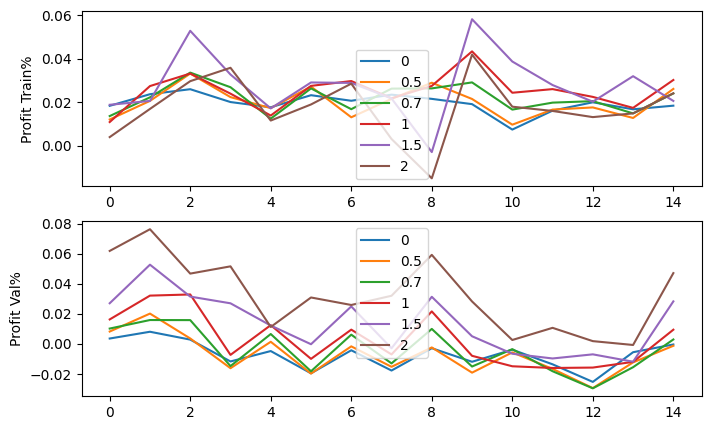

In [80]:
fig, ax= pyplot.subplots(2, figsize=(8,5))#sharex=True, 
ax[0].plot(np.array(range(ChartTestList.shape[0])),ChartTestList[:,0,:])
ax[0].set_ylabel("Profit Train%")
ax[0].legend(STDBorders)
ax[1].plot(np.array(range(ChartTestList.shape[0])),ChartValList[:,0,:])
ax[1].set_ylabel("Profit Val%")
ax[1].legend(STDBorders)
plt.show()

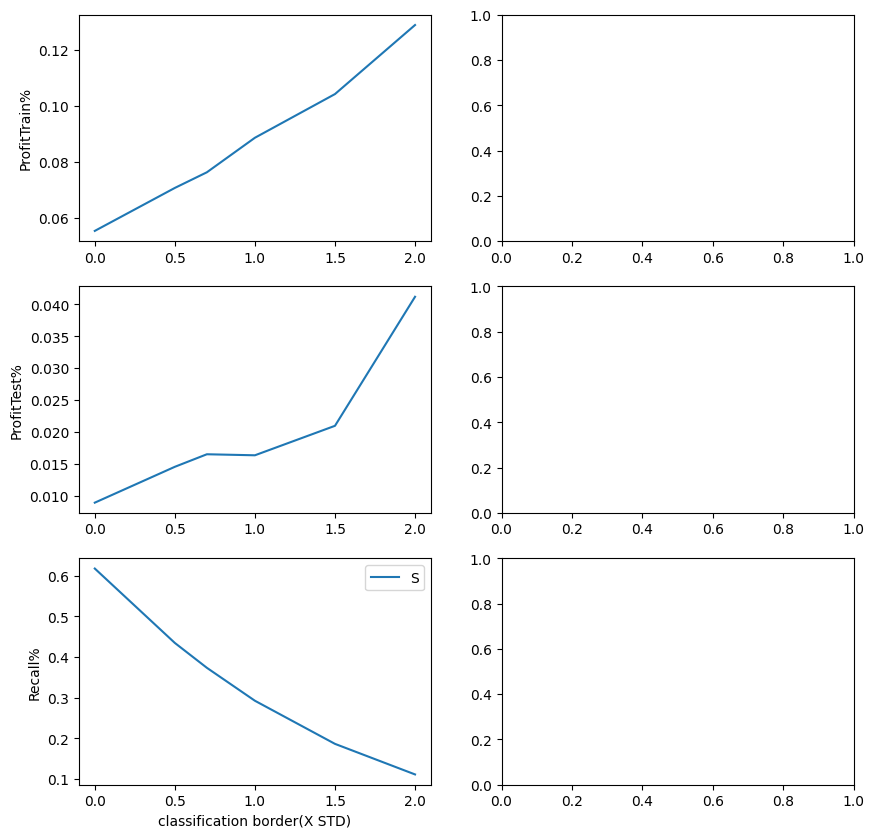

12559

In [104]:
#Предсказания на датасетах. Построение графиков доходности от границы классификации
pred1=model_10.predict(train_datagen_est[0][0])
pred2=model_10.predict(test_datagen_est[0][0])
pred3=model_10.predict(val_datagen_est[0][0])
PFArr,RecallArr,PFArrBuy,PFArrSell,VolumeBuy,VolumeSell,ProfitBuy,ProfitSell=ClassBorderProfit(pred1,train_datagen_est[0][2],STDBorders,AddSTDCorrection=True)
PFArr1,RecallArr1,PFArrBuy1,PFArrSell1,VolumeBuy1,VolumeSell1,ProfitBuy1,ProfitSell1=ClassBorderProfit(pred2,test_datagen_est[0][2],STDBorders,AddSTDCorrection=True)
PFArr2,RecallArr2,PFArrBuy2,PFArrSell2,VolumeBuy2,VolumeSell2,ProfitBuy2,ProfitSell2=ClassBorderProfit(pred3,val_datagen_est[0][2],STDBorders,AddSTDCorrection=True)
ShareName=["SBER"]
PaintProfitArr(STDBorders,PFArr,PF2=(PFArr2+PFArr1)/2,Recall=RecallArr,ShareName=ShareName[0],FileName=None,Size=(10, 10))
gc.collect()